In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
cab = pd.read_csv('Cab_Data.csv')
city = pd.read_csv('City.csv')
customer = pd.read_csv('Customer_ID.csv')
transaction = pd.read_csv('Transaction_ID.csv')

In [3]:
###cab data explore

In [4]:
cab.shape

(359392, 7)

In [5]:
cab.dtypes

Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

In [6]:
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [7]:
cab.count()

Transaction ID    359392
Date of Travel    359392
Company           359392
City              359392
KM Travelled      359392
Price Charged     359392
Cost of Trip      359392
dtype: int64

In [8]:
def date(stamp): 
    delta = pd.Timedelta(str(stamp)+'D')
    real_time = pd.to_datetime('1899-12-30') + delta
    return real_time

In [9]:
cab['Date of Travel'] = cab['Date of Travel'].map(date)

In [10]:
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [11]:
print('Unique Transaction ID: '+str(len(cab['Transaction ID'].unique())))
print('Unique Date of Travel: '+str(len(cab['Date of Travel'].unique())))
print('Unique Company: '+str(len(cab['Company'].unique())))
print('Unique City: '+str(len(cab['City'].unique())))
print('Unique KM Travelled: '+str(len(cab['KM Travelled'].unique())))
print('Unique Price Charged: '+str(len(cab['Price Charged'].unique())))
print('Unique Cost of Trip: '+str(len(cab['Cost of Trip'].unique())))

Unique Transaction ID: 359392
Unique Date of Travel: 1095
Unique Company: 2
Unique City: 19
Unique KM Travelled: 874
Unique Price Charged: 99176
Unique Cost of Trip: 16291


<AxesSubplot:>

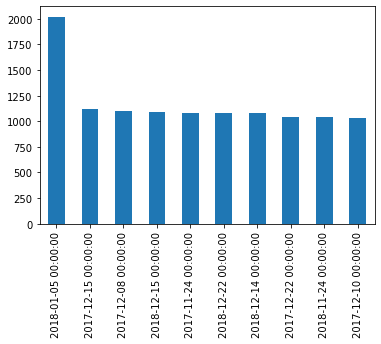

In [12]:
cab['Date of Travel'].value_counts().head(10).plot(kind='bar')

<AxesSubplot:>

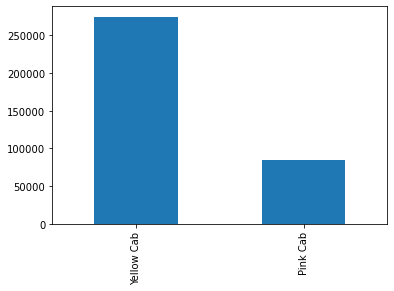

In [13]:
cab['Company'].value_counts().head(2).plot(kind='bar')

<AxesSubplot:>

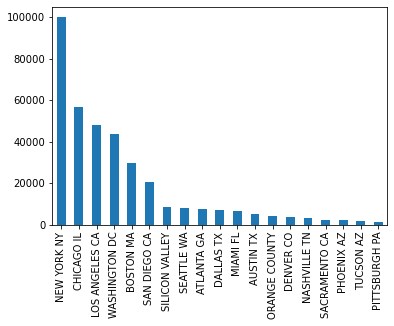

In [14]:
cab['City'].value_counts().head(20).plot(kind='bar')

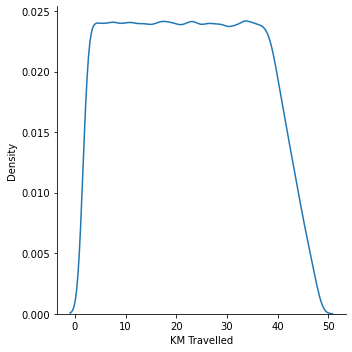

In [15]:
sns.displot(cab['KM Travelled'], kind = 'kde')

<AxesSubplot:xlabel='KM Travelled', ylabel='Company'>

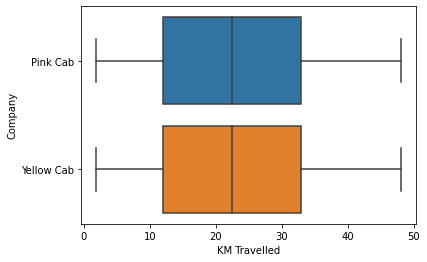

In [16]:
sns.boxplot(x='KM Travelled', y='Company', data=cab)

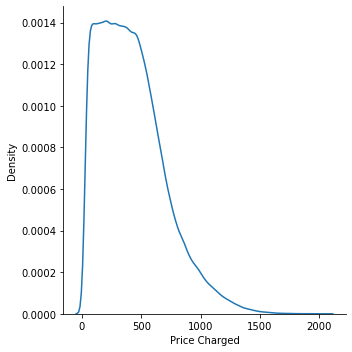

In [17]:
sns.displot(cab['Price Charged'], kind = 'kde')

<AxesSubplot:xlabel='Price Charged', ylabel='Company'>

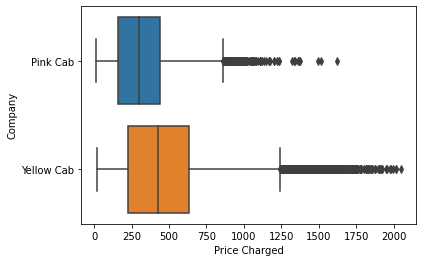

In [18]:
sns.boxplot(x='Price Charged', y='Company', data=cab)

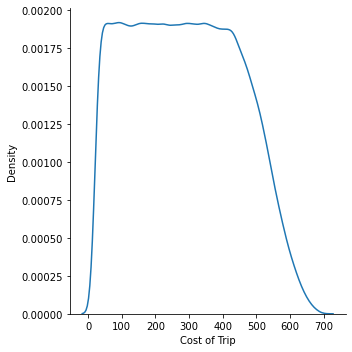

In [19]:
sns.displot(cab['Cost of Trip'], kind = 'kde')

<AxesSubplot:xlabel='Cost of Trip', ylabel='Company'>

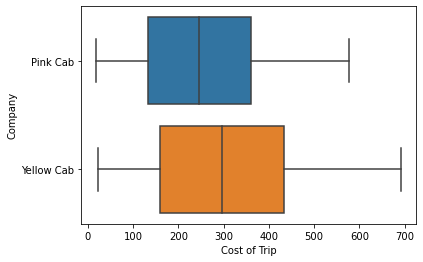

In [20]:
sns.boxplot(x='Cost of Trip', y='Company', data=cab)

In [21]:
categorical_data = cab[['Date of Travel','Company','City']]
numerical_data = cab[['KM Travelled','Price Charged','Cost of Trip']]

In [22]:
print('Field Name\tVal Populated\tNumber of Unique\tMost Common Value')

for c in categorical_data.columns:
    num_null = categorical_data[c].isnull().sum()
    per_populated = round(100-(num_null/359392)*100,2)
    num_unique = categorical_data[c].nunique()
    most_common_val = pd.Series(categorical_data[c].value_counts()).index[0]   
    print(f'{c}\t{per_populated}\t{num_unique}\t{most_common_val}')

Field Name	Val Populated	Number of Unique	Most Common Value
Date of Travel	100.0	1095	2018-01-05 00:00:00
Company	100.0	2	Yellow Cab
City	100.0	19	NEW YORK NY


In [23]:
print('Field Name\tVal Populated\tMin Value\tMax Value\tMean\tStandard Deviation\tZero Count')
for n in numerical_data.columns:
    num_null = numerical_data[n].isnull().sum()
    per_populated = round(100-(num_null/359392)*100,2)
    min_val = numerical_data[n].min()
    max_val = numerical_data[n].max()
    mean_val = round(numerical_data[n].mean(),2)
    std_val = round(numerical_data[n].std(),2)
    num_zero = len(numerical_data[numerical_data[n] == 0])
    per_zero = round(num_zero/359392*100,2)
    print(f'{n}\t{per_populated}\t{min_val}\t{max_val}\t{mean_val}\t{std_val}\t{per_zero}')

Field Name	Val Populated	Min Value	Max Value	Mean	Standard Deviation	Zero Count
KM Travelled	100.0	1.9	48.0	22.57	12.23	0.0
Price Charged	100.0	15.6	2048.03	423.44	274.38	0.0
Cost of Trip	100.0	19.0	691.2	286.19	157.99	0.0


In [24]:
###city data explore

In [25]:
city

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [26]:
city.dtypes

City          object
Population    object
Users         object
dtype: object

In [27]:
#customer explore

In [28]:
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [29]:
customer.dtypes

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

In [30]:
customer.count()

Customer ID           49171
Gender                49171
Age                   49171
Income (USD/Month)    49171
dtype: int64

In [31]:
# transaction explore

In [32]:
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [33]:
transaction.dtypes

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object

In [34]:
transaction.count()

Transaction ID    440098
Customer ID       440098
Payment_Mode      440098
dtype: int64

In [35]:
cab_merge_city = pd.merge(left=cab, right=city, left_on='City', right_on='City')
cab_merge_transaction = pd.merge(left=cab_merge_city, right=transaction, left_on='Transaction ID',right_on='Transaction ID')
df_all = pd.merge(left=cab_merge_transaction, right=customer, left_on='Customer ID', right_on='Customer ID')

In [36]:
df_all.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701",29290,Card,Male,28,10813
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701",29290,Cash,Male,28,10813
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701",29290,Card,Male,28,10813
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701",27703,Card,Male,27,9237
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701",27703,Card,Male,27,9237


In [37]:
# hypothesis 1:
#               
# Null hypothsis: The average cost of trip for yellow Cab is not overall 
#               significantly higher than that of Pink Cab.
# Alternative hypothsis: The average cost of trip for yellow Cab is overall 
#               significantly higher than that of Pink Cab.

In [38]:
from scipy import stats
import random

data1 = cab[cab['Company']=='Yellow Cab']['Cost of Trip']
data2 = cab[cab['Company']=='Pink Cab']['Cost of Trip']

# repeat the t-test for 30 times 

for i in range(30):
    sample1 = random.sample(list(data1),500)
    sample2 = random.sample(list(data2),500)
    print(stats.ttest_ind(sample1,sample2))
    
# pvalue is always smaller than alpha=0.01, so we can accept the hypothesis 1

Ttest_indResult(statistic=4.491710644815795, pvalue=7.890363554682075e-06)
Ttest_indResult(statistic=6.252354952612611, pvalue=5.984136871707542e-10)
Ttest_indResult(statistic=6.935586194376684, pvalue=7.261198086407639e-12)
Ttest_indResult(statistic=5.0462388866874885, pvalue=5.352286956506775e-07)
Ttest_indResult(statistic=4.569362228937728, pvalue=5.504126951340745e-06)
Ttest_indResult(statistic=5.162430556289632, pvalue=2.941235412412464e-07)
Ttest_indResult(statistic=5.695367673299244, pvalue=1.618767826481006e-08)
Ttest_indResult(statistic=6.03474144642084, pvalue=2.241583211312134e-09)
Ttest_indResult(statistic=4.865487053570167, pvalue=1.3261789302583951e-06)
Ttest_indResult(statistic=5.4120506691298145, pvalue=7.803342175745458e-08)
Ttest_indResult(statistic=5.957547509535281, pvalue=3.545740436239763e-09)
Ttest_indResult(statistic=5.437063818228506, pvalue=6.811033745504412e-08)
Ttest_indResult(statistic=6.982800943491018, pvalue=5.274898539801835e-12)
Ttest_indResult(statist

In [39]:
# hypothesis 2: Besides cost of trip, the income level, age, and length of trip have casual effects on the price finally charged.

In [40]:
#remove outliers
df_test = df_all[df_all['Price Charged'] <= 800]

In [41]:
from statsmodels.formula.api import ols

df_test = df_test.rename(columns={"KM Travelled": "triplength", "Price Charged": "price", "Cost of Trip": "cost", "Income (USD/Month)": "income"})

lr1 = ols('price~triplength',data=df_test).fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 1.006e+06
Date:                Tue, 14 Jun 2022   Prob (F-statistic):               0.00
Time:                        00:24:55   Log-Likelihood:            -1.9570e+06
No. Observations:              324607   AIC:                         3.914e+06
Df Residuals:                  324605   BIC:                         3.914e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     44.4642      0.363    122.651      0.000      43.754      45.175
triplength    15.1387      0.015   1002.771      0.000      15.109      15.168
==============================================================================
Omnibus:                    41141.379   Durbin-Watson:                   1.350
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            64708.472
Skew:                           0.902   Prob(JB):                         0.00
Kurtosis:                       4.238   Cond. No.                         49.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
lr2 = ols('price~triplength+Age+income',data=df_test).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 3.352e+05
Date:                Tue, 14 Jun 2022   Prob (F-statistic):               0.00
Time:                        00:24:55   Log-Likelihood:            -1.9570e+06
No. Observations:              324607   AIC:                         3.914e+06
Df Residuals:                  324603   BIC:                         3.914e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.0724      0.697     64.693      0.000      43.707      46.438
triplength    15.1388      0.015   1002.789      0.000      15.109      15.168
Age           -0.0374      0.014     -2.678      0.007      -0.065      -0.010
income      4.742e-05   2.21e-05      2.144      0.032    4.08e-06    9.08e-05
==============================================================================
Omnibus:                    41137.053   Durbin-Watson:                   1.350
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            64701.541
Skew:                           0.902   Prob(JB):                         0.00
Kurtosis:                       4.238   Cond. No.                     6.72e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
# Thus we can accept hypothesis 2.

In [44]:
# hypothesis 3: Males tend to spend more on cab than females.

In [52]:
df_test = df_test.replace('Male',1)
df_test = df_test.replace('Female',0)
lr3 = ols('price~triplength+Age+income+Gender',data=df_test).fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.515e+05
Date:                Tue, 14 Jun 2022   Prob (F-statistic):               0.00
Time:                        00:29:21   Log-Likelihood:            -1.9570e+06
No. Observations:              324607   AIC:                         3.914e+06
Df Residuals:                  324602   BIC:                         3.914e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.8320      0.726     59.014      0.000      41.409      44.254
triplength    15.1399      0.015   1003.025      0.000      15.110      15.170
Age           -0.0380      0.014     -2.722      0.006      -0.065      -0.011
income      4.765e-05   2.21e-05      2.155      0.031    4.31e-06     9.1e-05
Gender         3.9155      0.356     10.991      0.000       3.217       4.614
==============================================================================
Omnibus:                    41074.953   Durbin-Watson:                   1.351
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            64570.250
Skew:                           0.901   Prob(JB):                         0.00
Kurtosis:                       4.237   Cond. No.                     7.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
# Thus we can accept hypothesis 3.

In [54]:
# hypothesis 4: Price charged do have seasonal pattern.

In [55]:
df_test.head()

,Transaction ID,Date of Travel,Company,City,triplength,price,cost,Population,Users,Customer ID,Payment_Mode,Gender,Age,income
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701",29290,Card,1,28,10813
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701",29290,Cash,1,28,10813
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701",29290,Card,1,28,10813
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701",27703,Card,1,27,9237
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701",27703,Card,1,27,9237


In [67]:
df_time_price = df_test.groupby(['Date of Travel']).sum()[['price']]

<AxesSubplot:xlabel='Date of Travel', ylabel='price'>

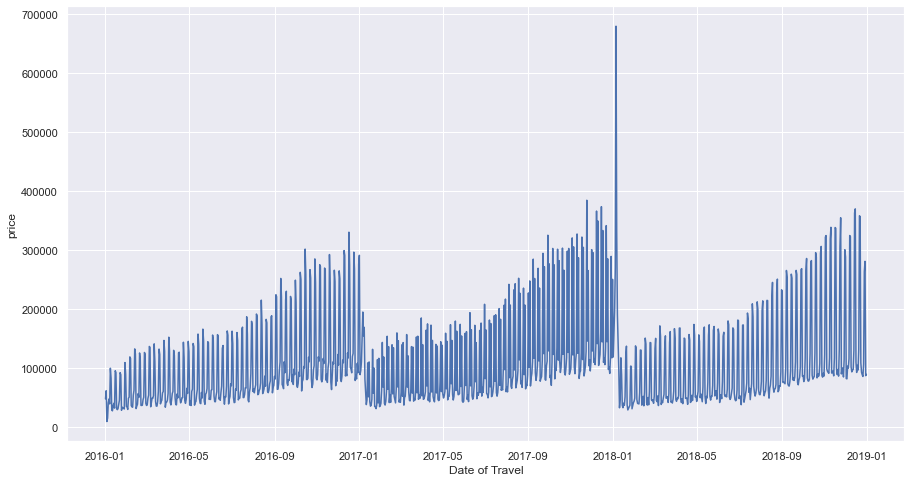

In [80]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(x="Date of Travel", y="price", data=df_time_price)


<AxesSubplot:xlabel='Date of Travel', ylabel='price'>

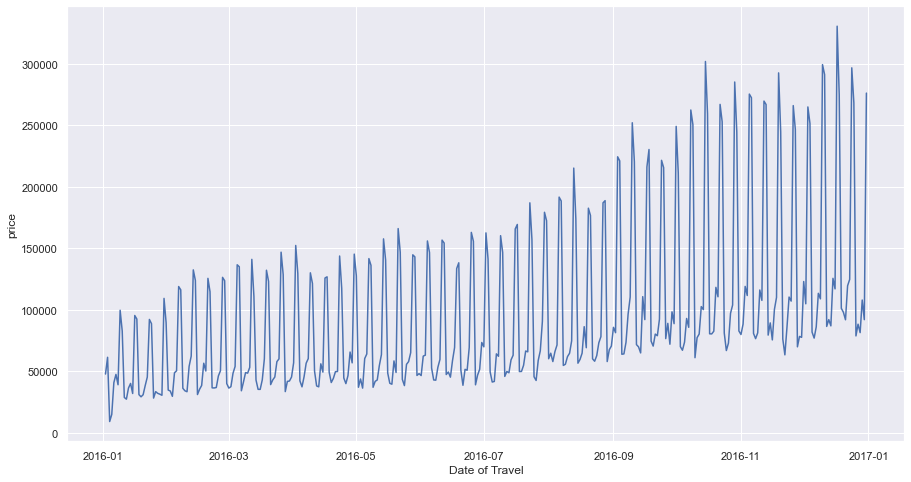

In [82]:
# price change in 2016
sns.lineplot(x="Date of Travel", y="price", data=df_time_price[:365])

<AxesSubplot:xlabel='Date of Travel', ylabel='price'>

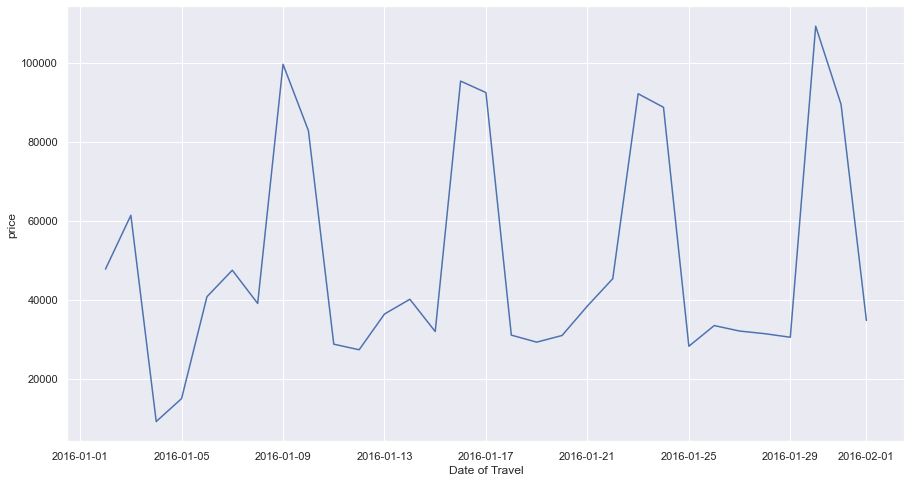

In [81]:
sns.lineplot(x="Date of Travel", y="price", data=df_time_price[:31])

In [83]:
# It does not have clearly seasonal pattern, however, 
# price in fall and winter are slightly higher than spring and summer.

# Also, price charged shows weekly pattern, price charged in weekend is higher than that in weekday.

In [84]:
# hypothesis 5: As price gets higher, customers are more likely to use card instead of cash, and
# as customers aged, they prefer to use card.

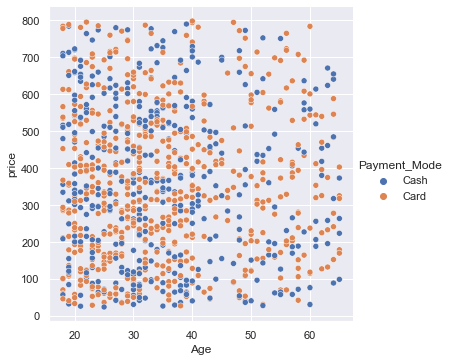

In [100]:
df_sample = df_test.sample(1000)
sns.relplot(
    data=df_sample,
    x="Age", y="price",
    hue="Payment_Mode",
    sizes=(10, 200))

In [ ]:
# The distribution plot does not show clear evidence that the hypothe